In [1]:
cd ..

/Users/yanndubois/Desktop/GitHub/alpaca_eval


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [3]:
from alpaca_eval import utils, metrics, annotators, constants, analyze, plotting
import pandas as pd

/Users/yanndubois/opt/anaconda3/envs/alpaca_eval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df=pd.read_json("results/all_annotations_claude.json")
#df=pd.read_json("results/all_annotations_alpaca_eval_gpt4.json")

In [5]:
assert len(df["generator_1"].unique()) == 1

# Analyzing a leaderboard

First let us test whether models are statistically signficiantly different from each other.

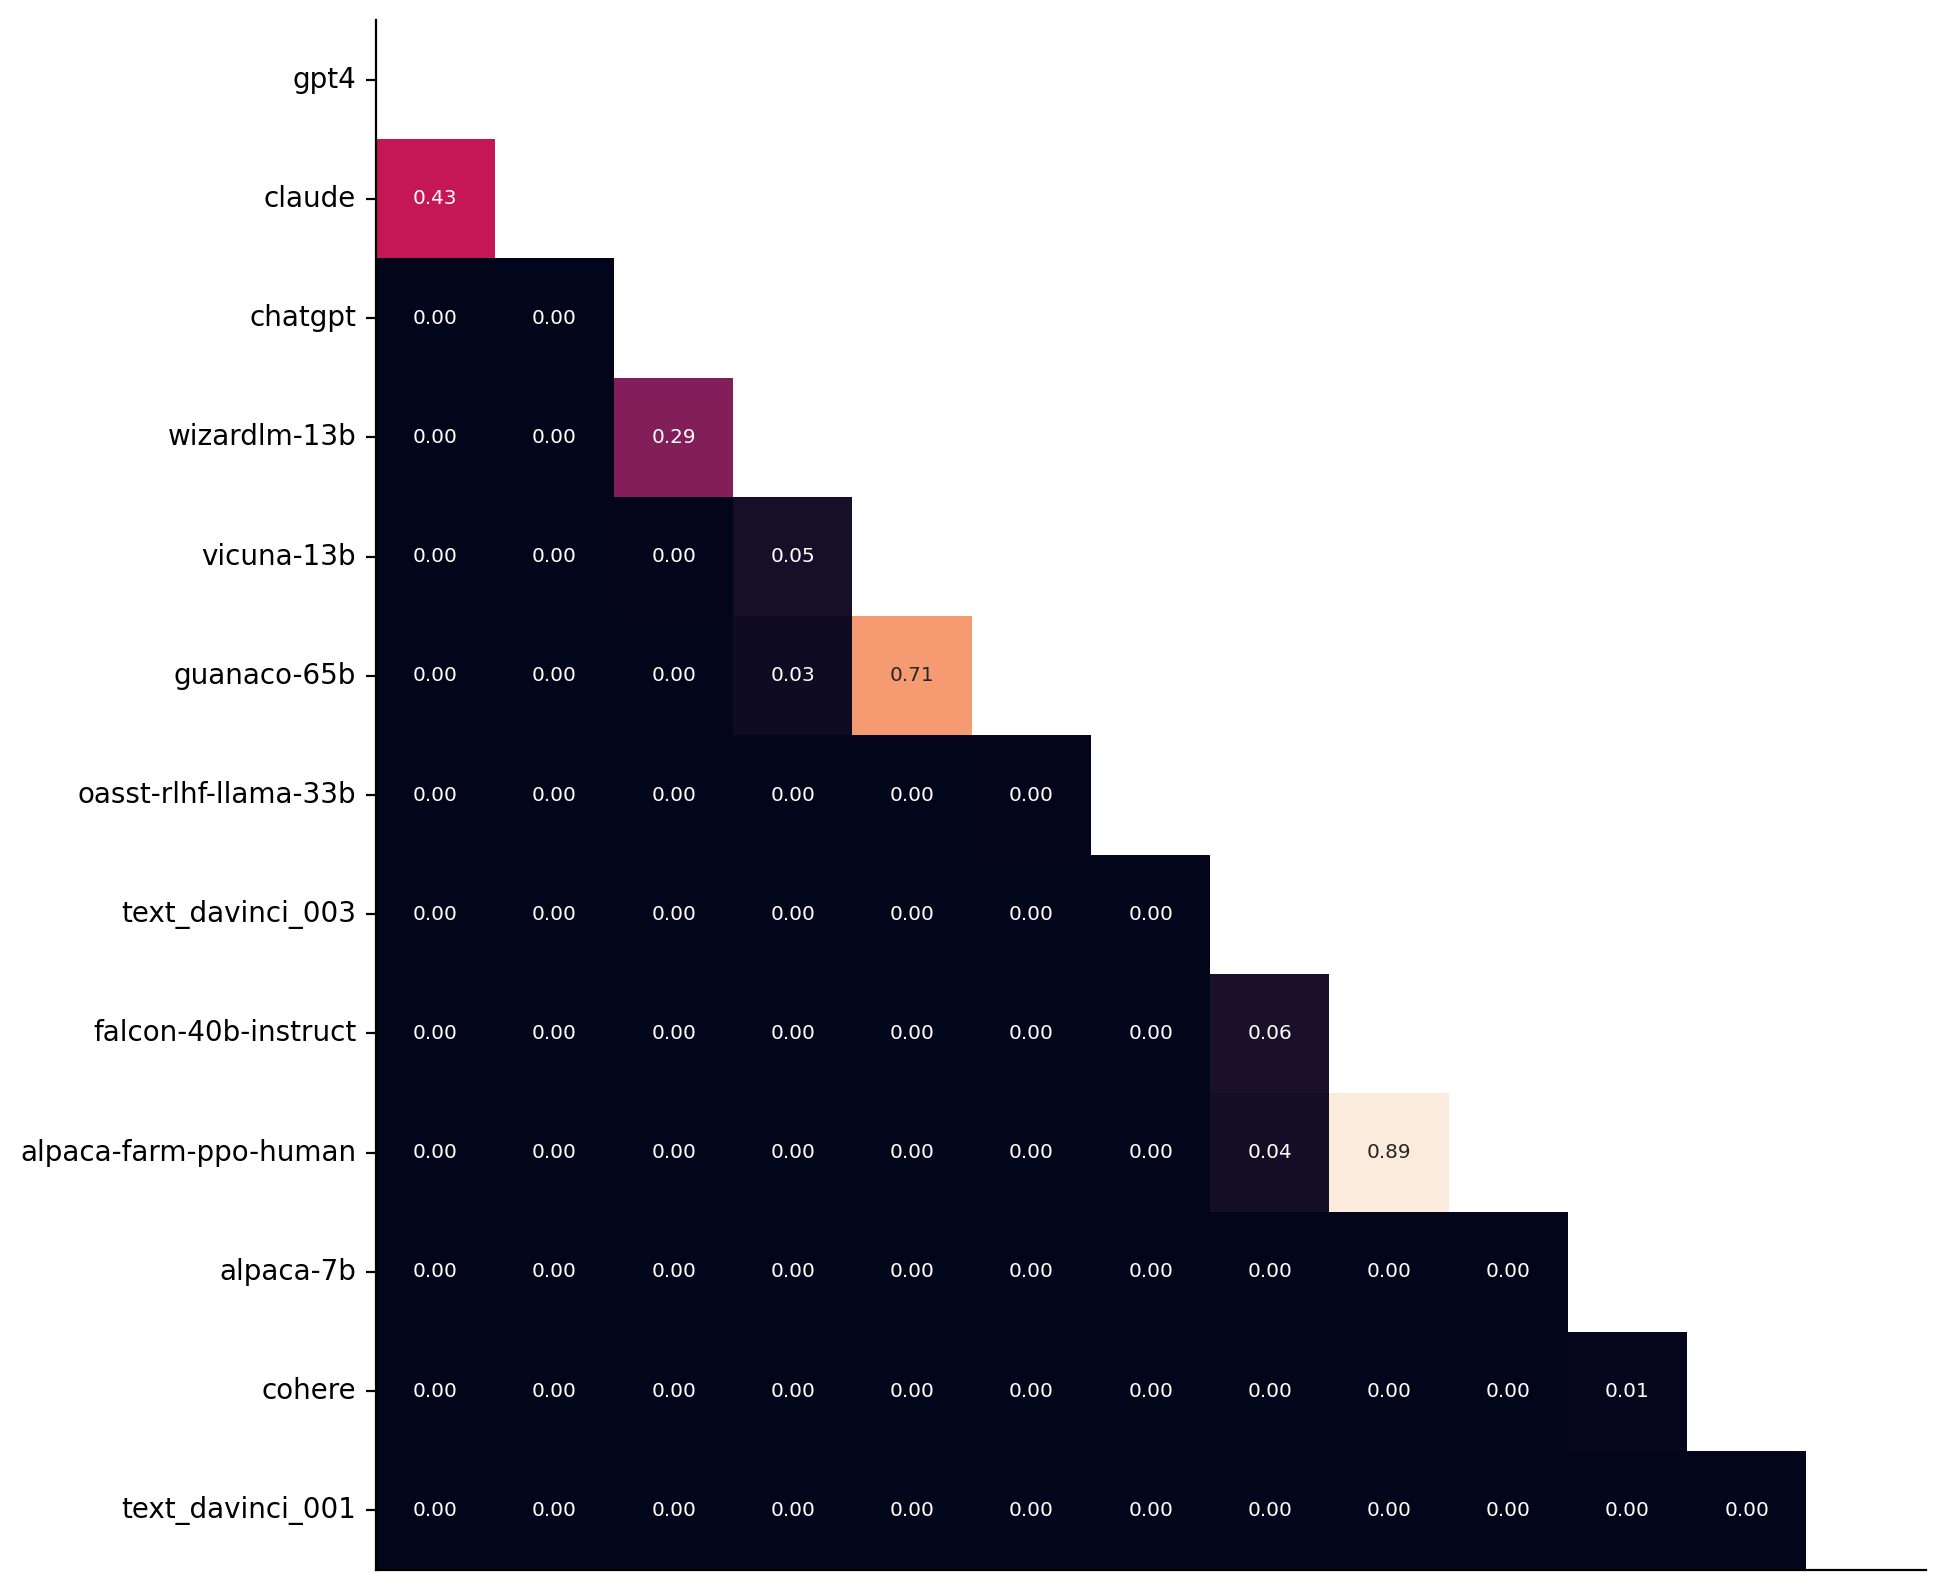

In [11]:
g = plotting.plot_paired_ttests(df)

This shows that the AlpacaEval has enough power to distinguish between each other. But it is also fairly large 800 examples, one might thus wonder how many examples are actually necessary

# Deciding the size of an evaluation set

One way of deiding is considering the aggregated pvalue of the previous plot.

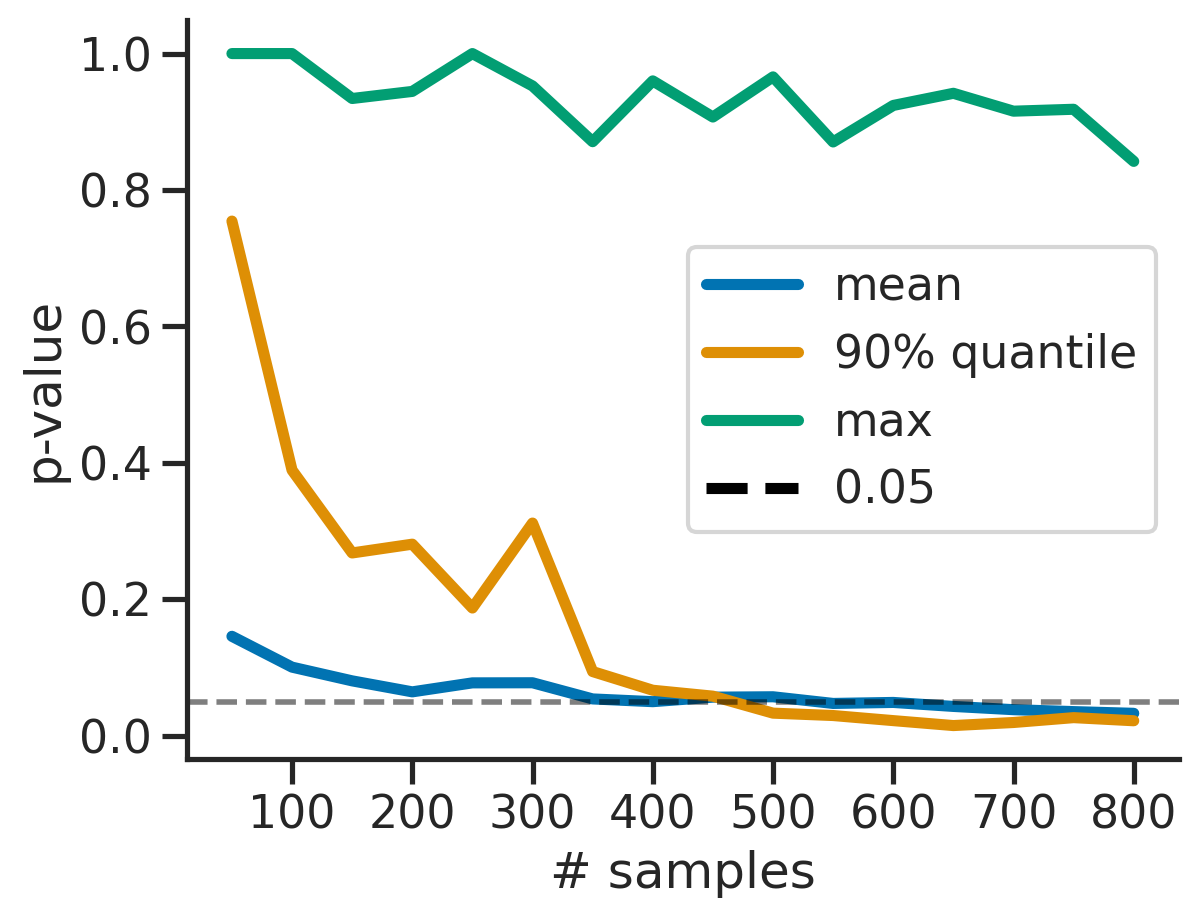

In [12]:
g = plotting.plot_paired_ttests_pvalues(df)

We see that around 500 samples are already sufficient to distinguish the vast majority (90%) of models in a statistically significant way.

Another plot one can look at is how many samples are needed for each being able to distinguish each pair.

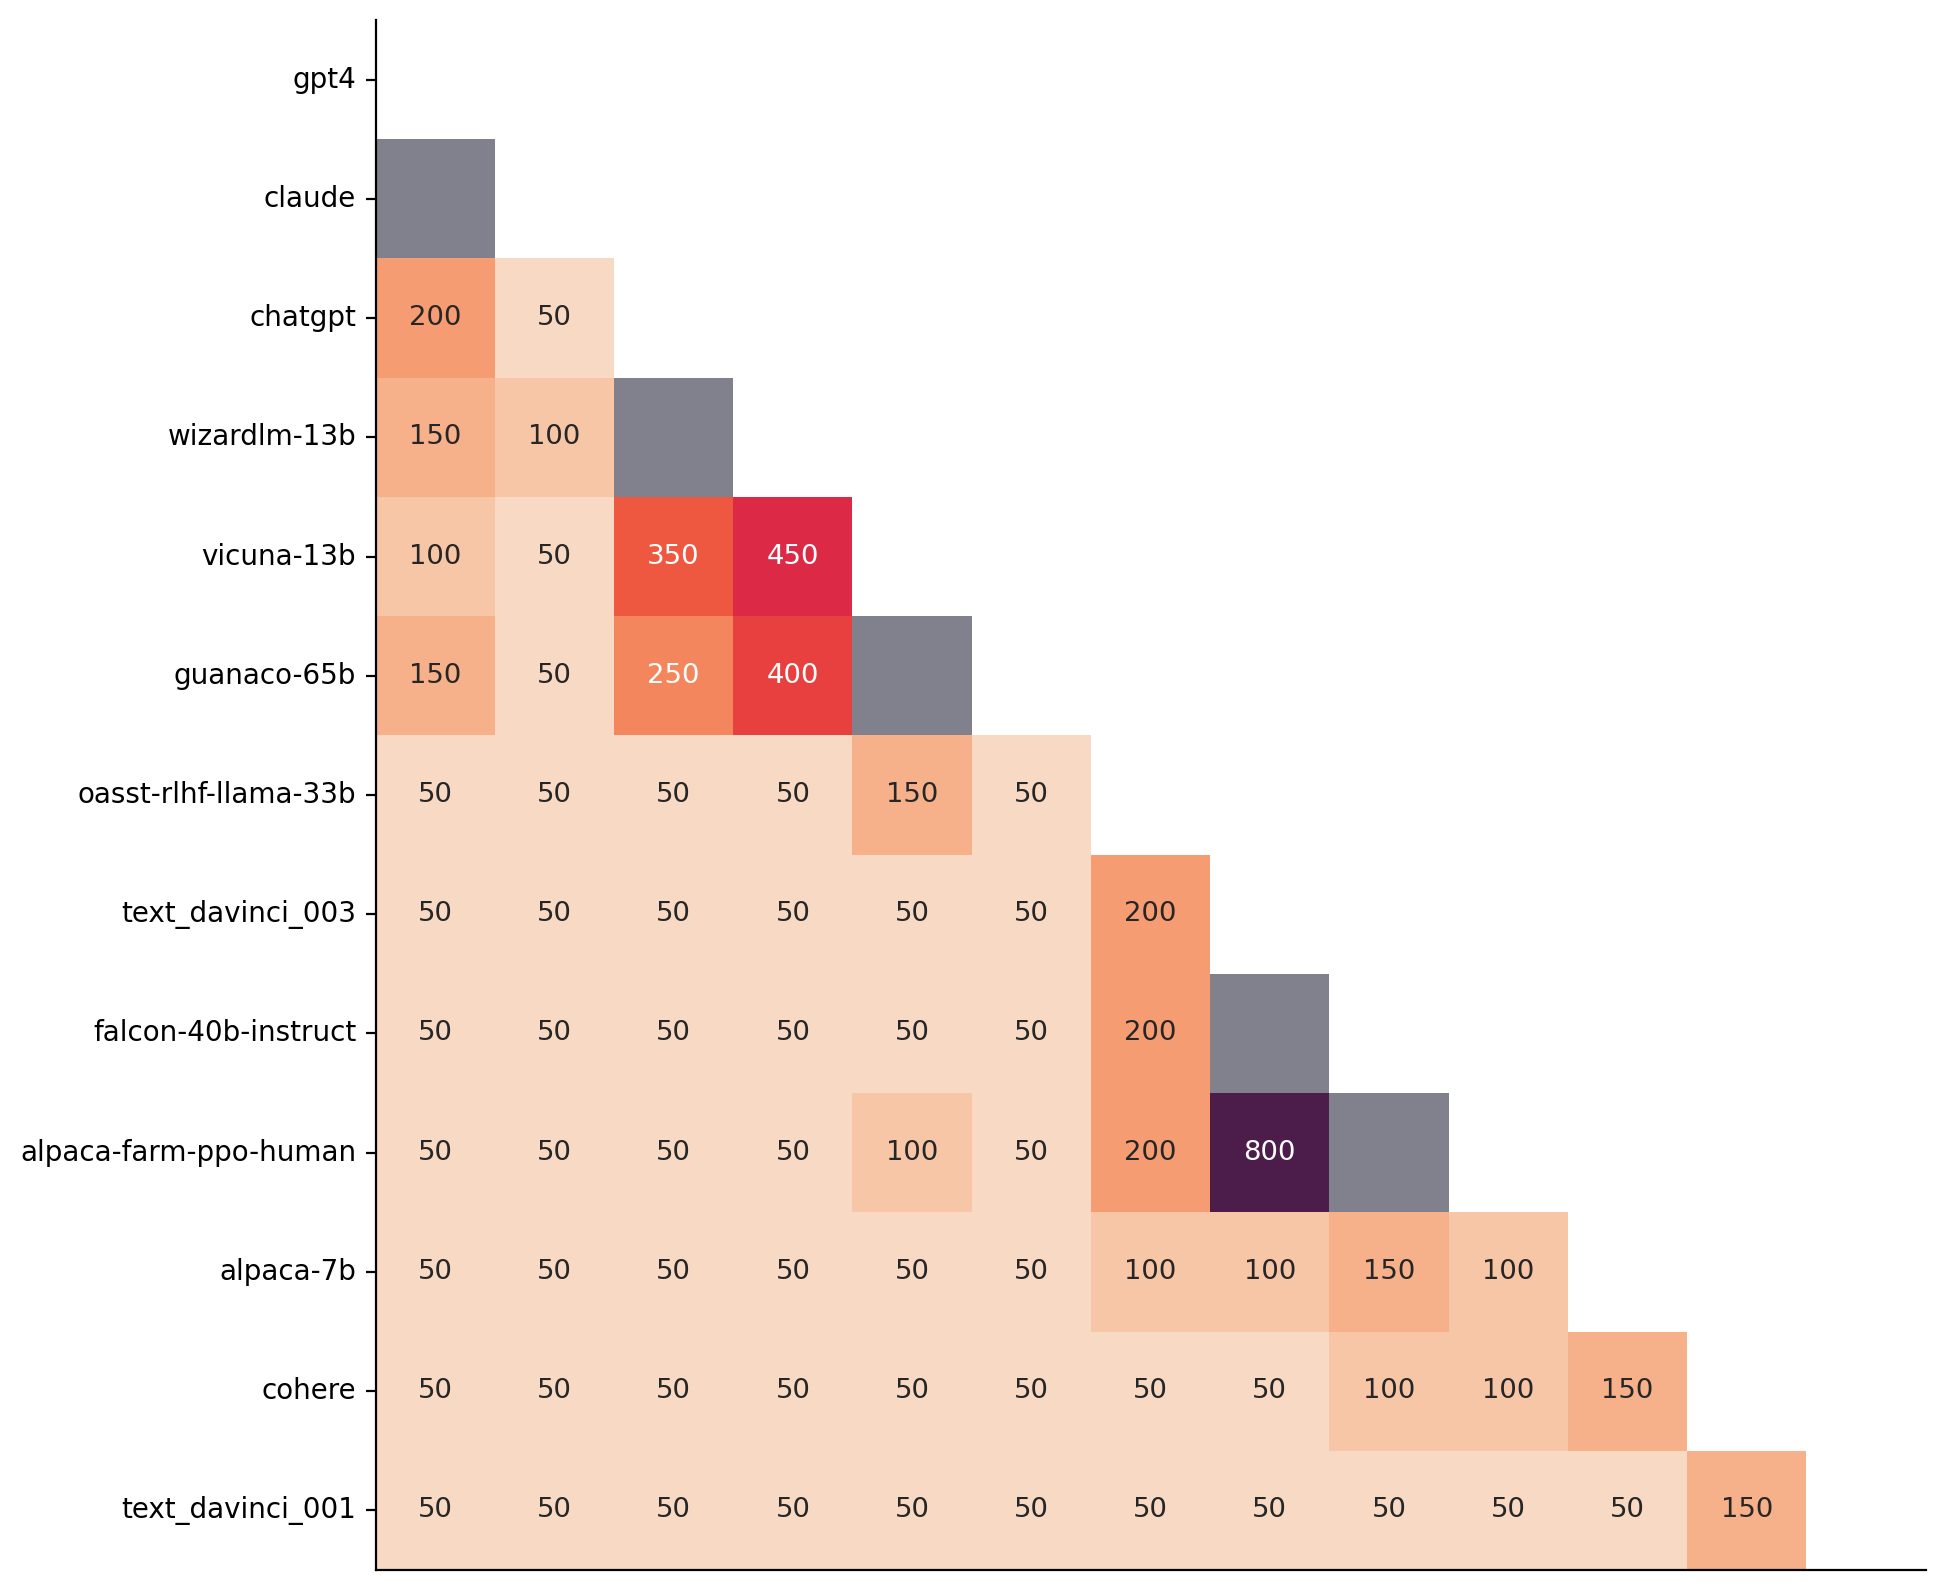

In [6]:
g = plotting.plot_paired_ttest_nsamples(df)
plotting.save_fig(g, "figures/plot_paired_ttest_nsamples.png")

This shows that many pairs can already be distinguished with as few as 50 examples, but going up to 450 allows to distinguish many other models. 

# Deciding the data in an evaluation set

Another important question when designing an evaluation set, is what data to use. In AlpacaFarm we used a mixture of different datasets, which begs the question: what data to mix. One way to try to answer this is by considering the statistical power when comparing different pairs on data from that distribution while controlling for the number of samples. The smallest subset is vicuna which has only 80 examples, so let us look at the statistical power of each dataset when they are restricted to 80 examples.

helpful_base mean p-val: 0.084 max p-val: 0.825
koala mean p-val: 0.099 max p-val: 1.000
oasst mean p-val: 0.094 max p-val: 1.000
selfinstruct mean p-val: 0.156 max p-val: 1.000
vicuna mean p-val: 0.075 max p-val: 1.000


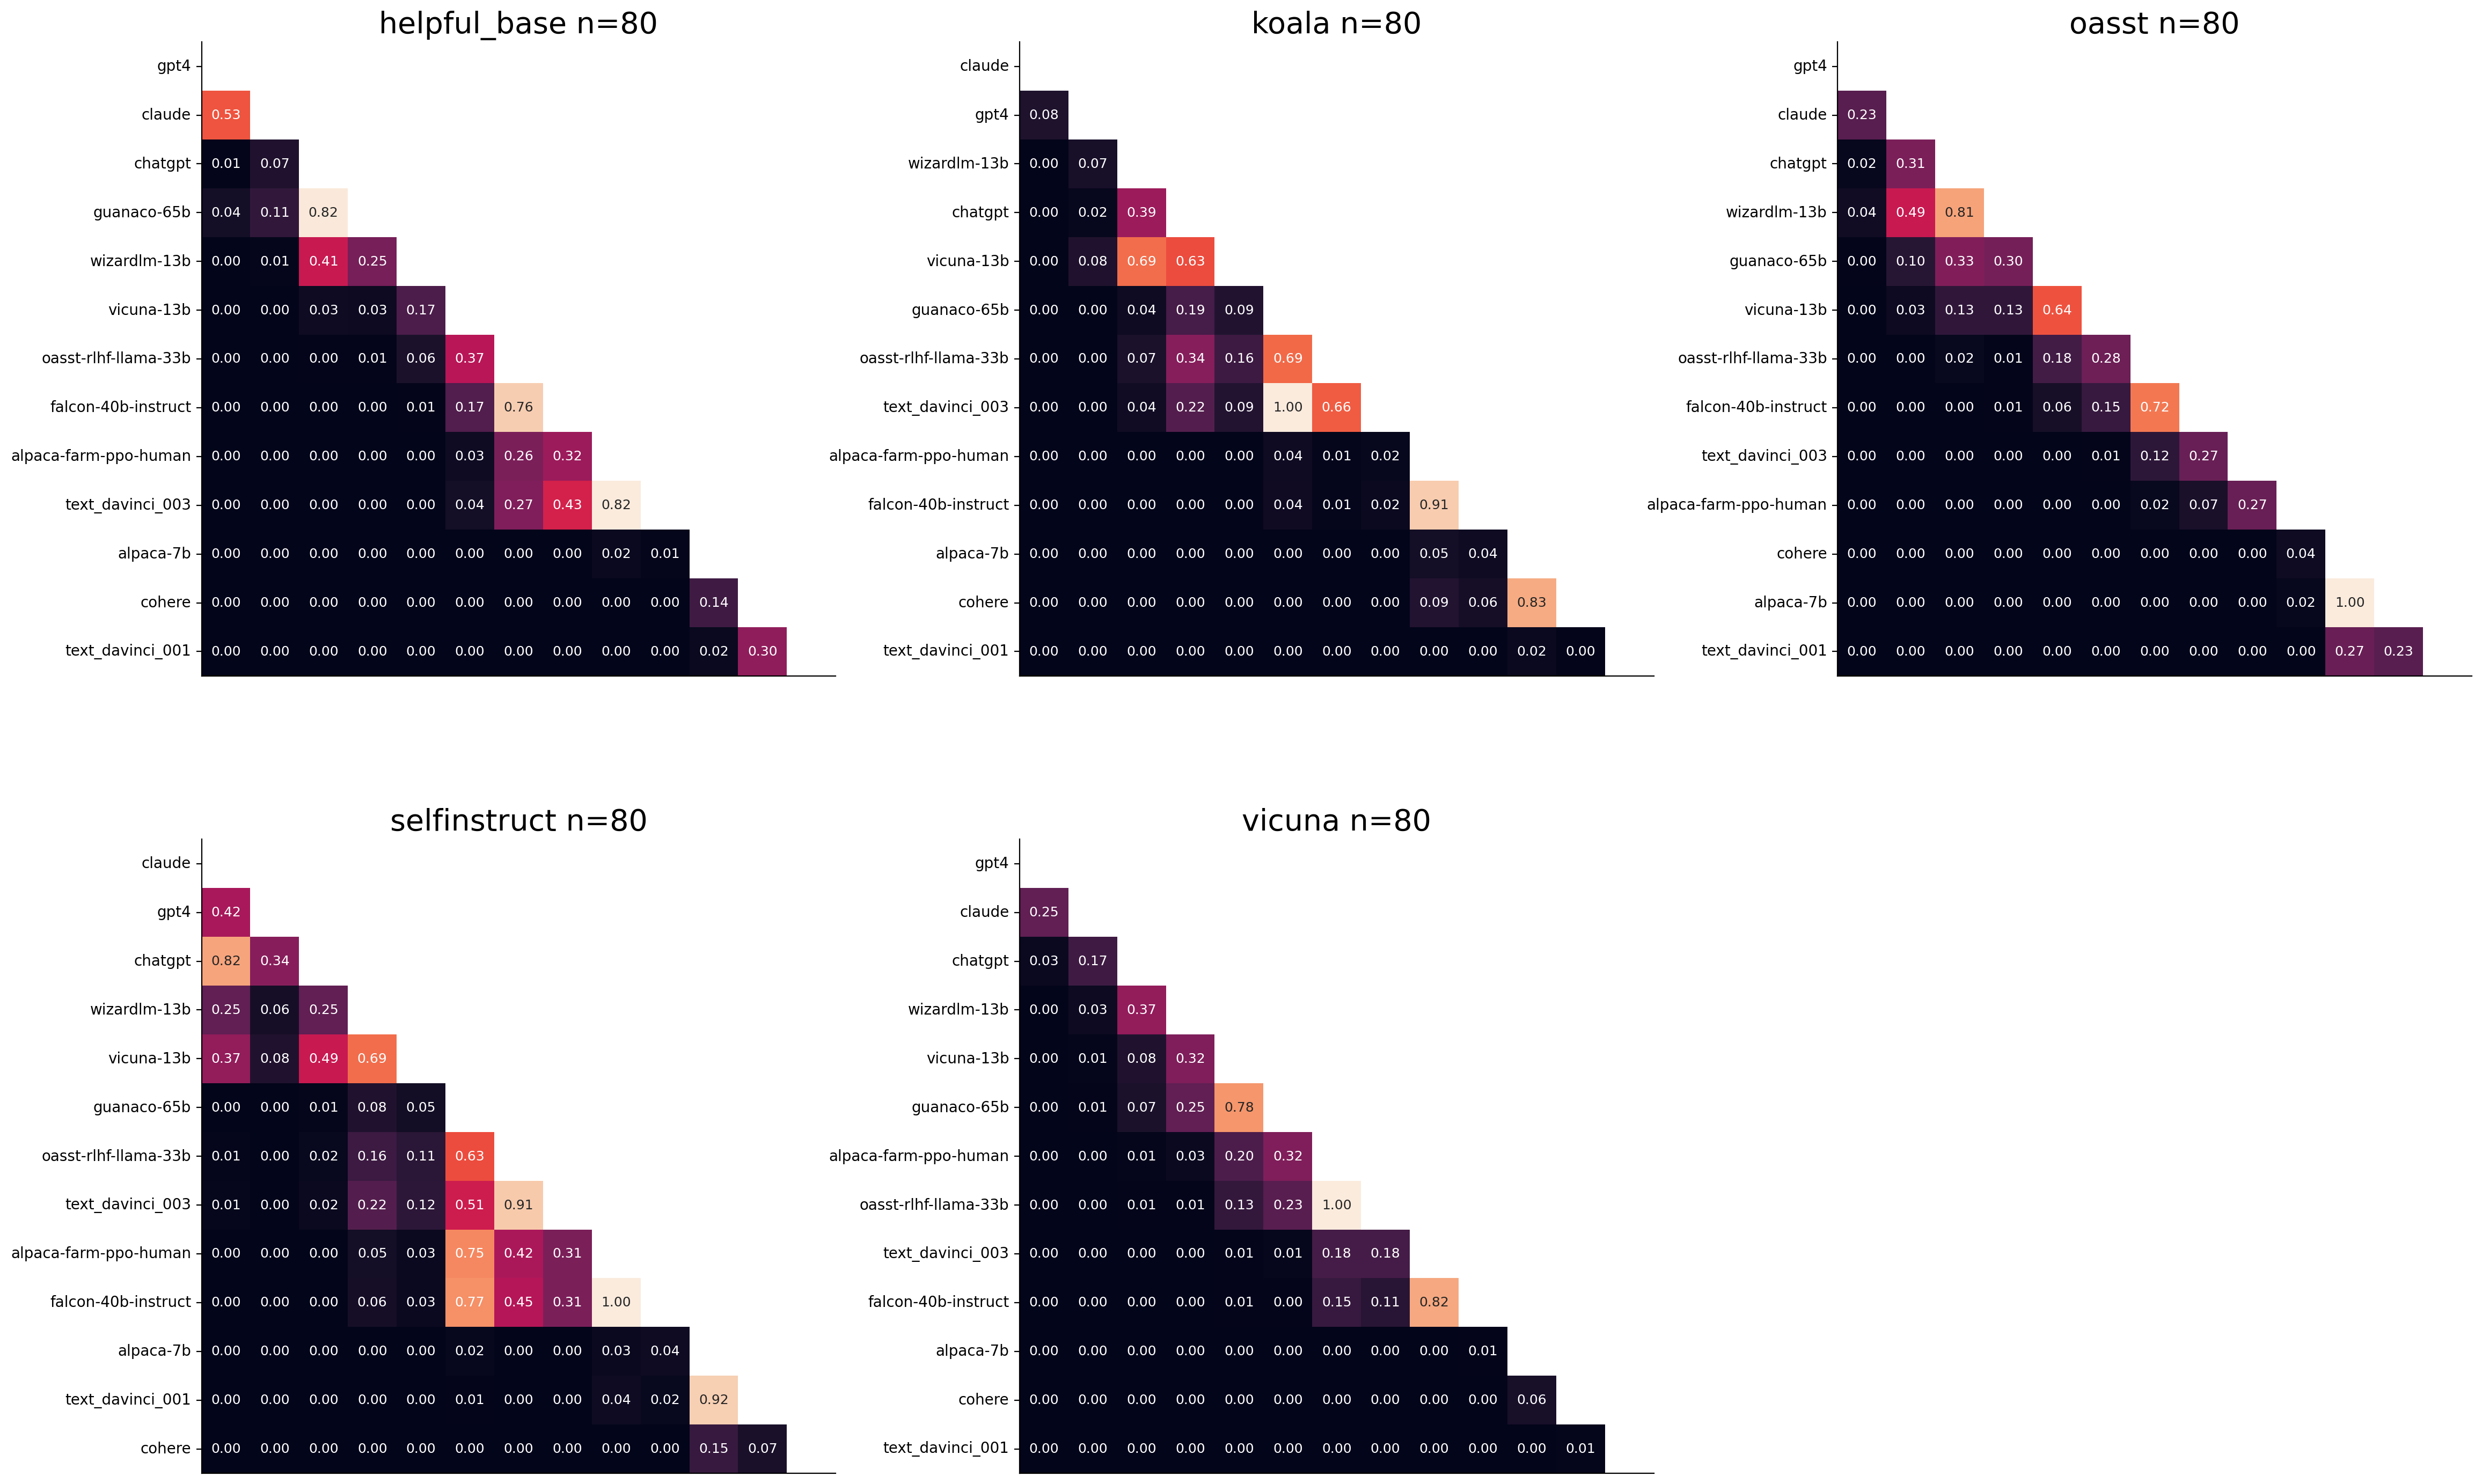

In [6]:
g = plotting.plot_paired_ttests_per_dataset(df, is_print_values=True)
plotting.save_fig(g, "figures/plot_paired_ttests_per_dataset.png")

We see that self-instruct is the dataset that yields the least statistical power!